<a href="https://colab.research.google.com/github/SeokHyeon-Hwang/programmerspython/blob/master/181228_Titanic_model02(hwang).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 영어로 된 것, 결측치가 있는 것들을 처리를 한 후, 모델을 만든다.

### 나이와 승선항을 결측치 처리 후, 확인해 보자.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

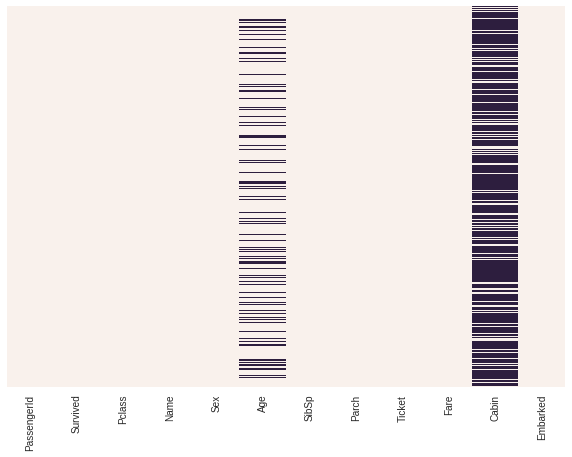

In [0]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

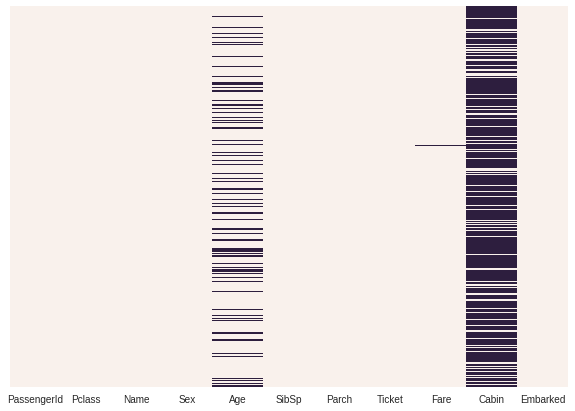

In [0]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


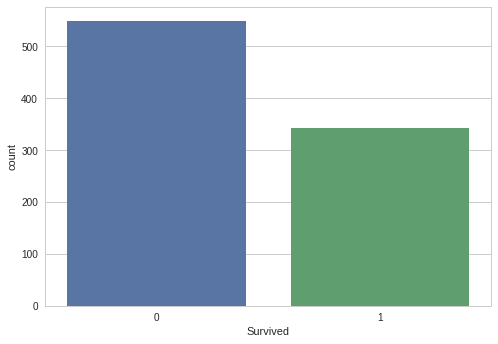

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

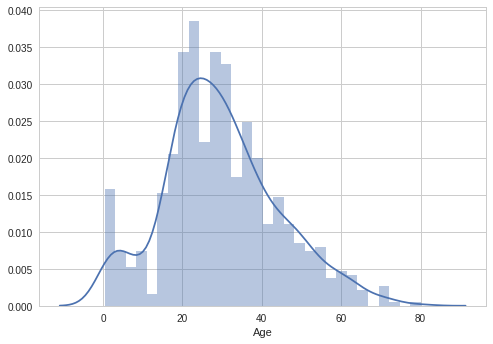

In [0]:
sns.distplot(train['Age'].dropna(), bins=30)

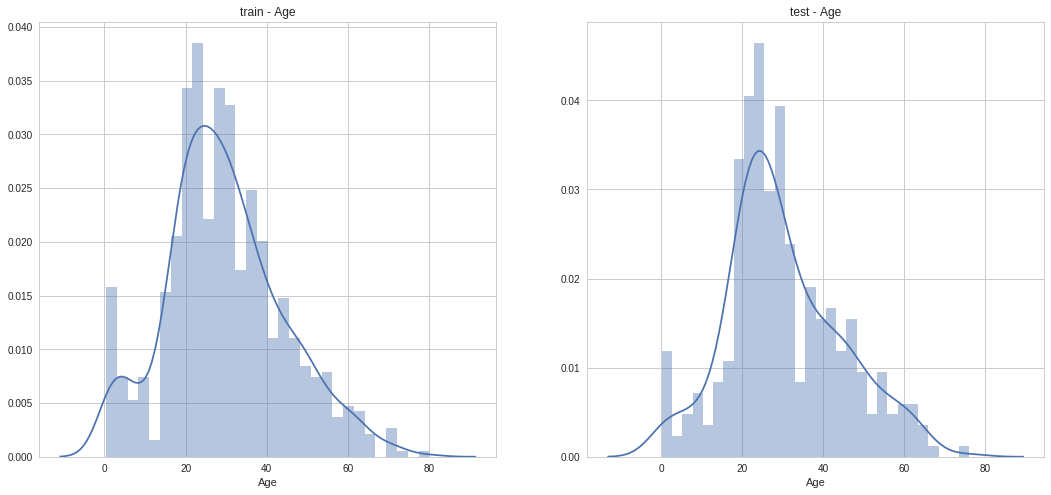

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30,ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

## 결측치 처리

In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [0]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 결측치 처리

In [0]:
train['Embarked'].value_counts()
val_Embarked = train['Embarked'].value_counts()
val_Embarked


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

## Fare

In [0]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [0]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [0]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 83.6+ KB
None


In [0]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

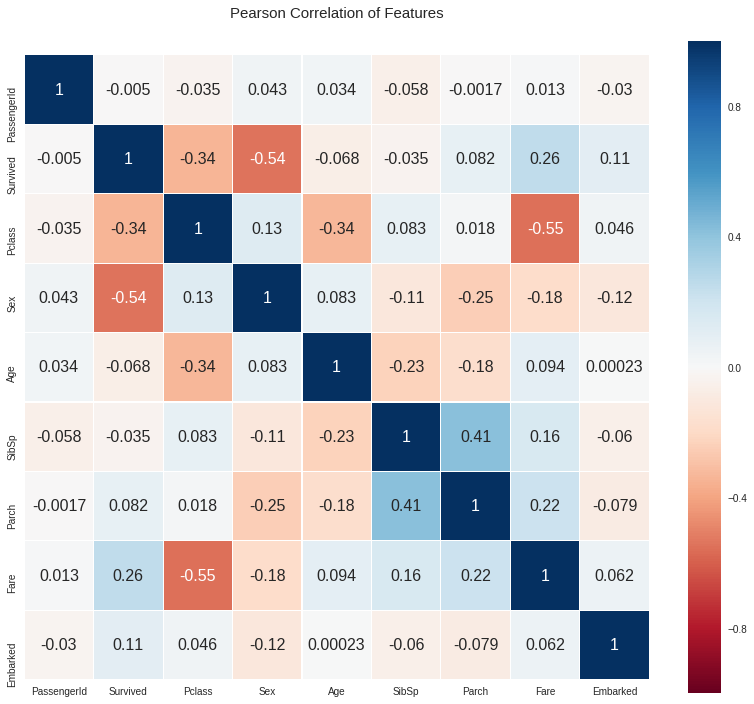

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [0]:
from sklearn.linear_model import LogisticRegression
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')


In [0]:
model = LogisticRegression()
# 학습
model.fit(X_train, y_train)
# 예측
predictions = model.predict(X_test)
predictions[:15]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
test_passengerId = test['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred})
df_pred.to_csv("logistic_second_model.csv", index=False)